# *Analise exploratória*

In [10]:
# "Montando" o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Importações iniciais
import pandas as pd 
import seaborn as sns

In [12]:
# Fonte: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
df = pd.read_csv('/content/drive/MyDrive/Dados/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
# Instalando e importando o SweetViz
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


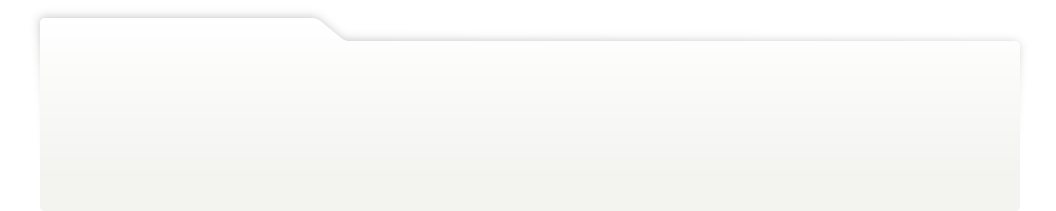
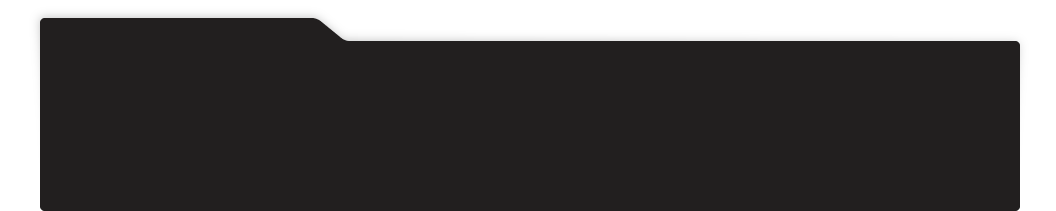
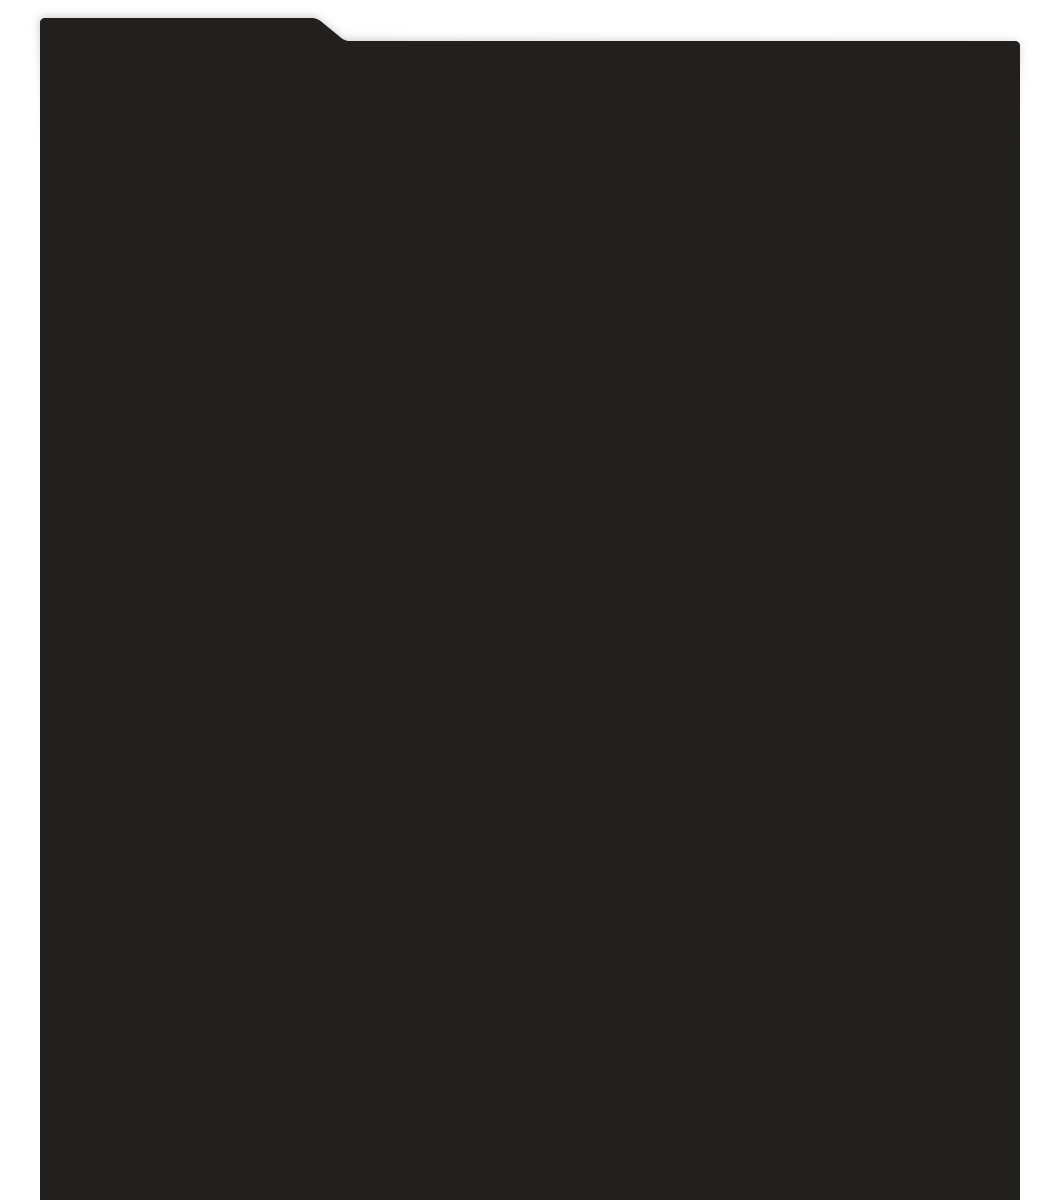
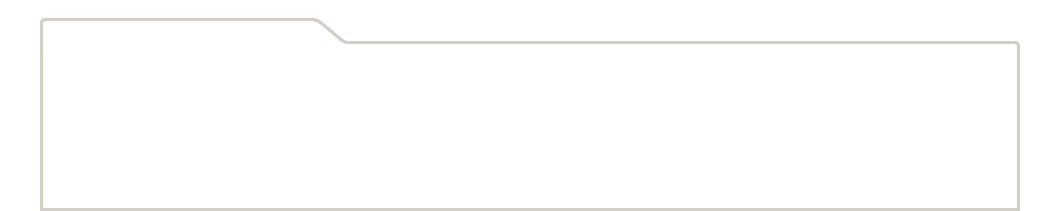
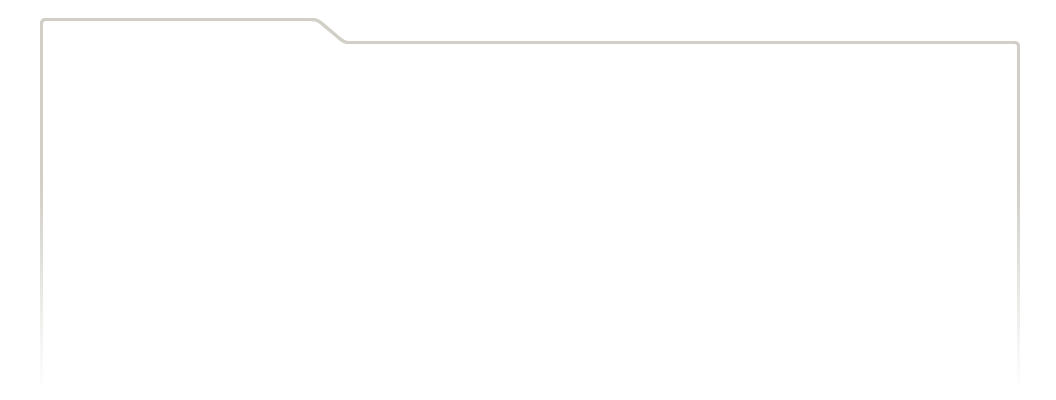
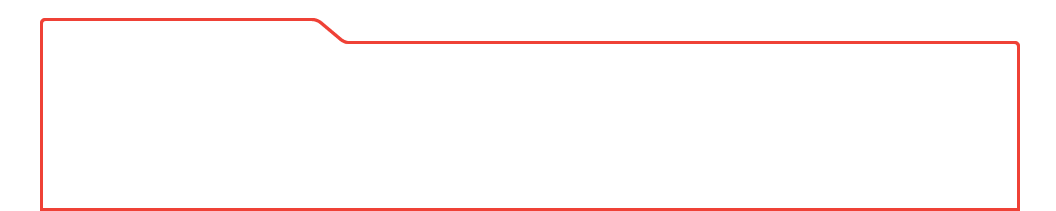
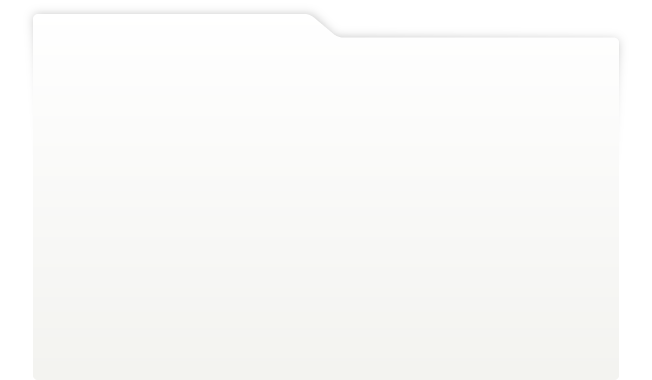
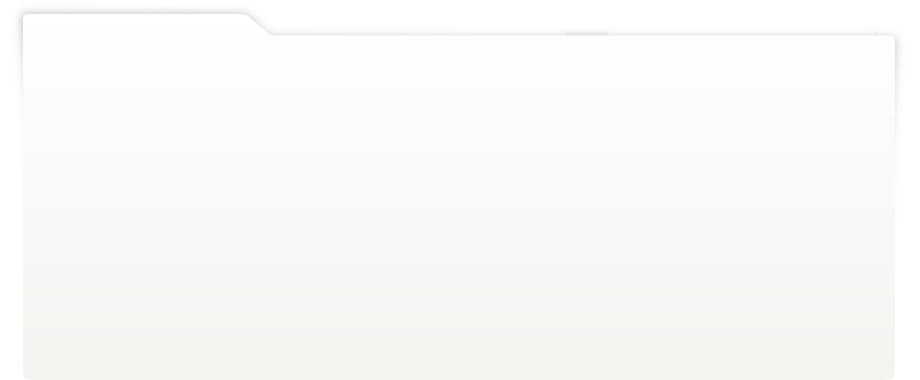
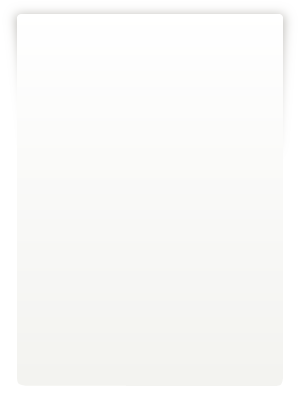
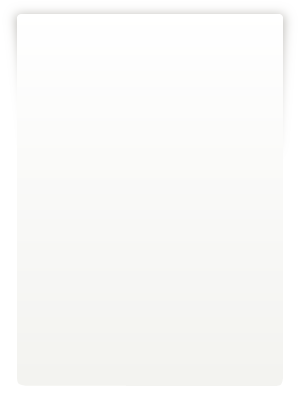
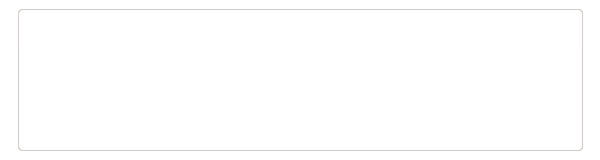
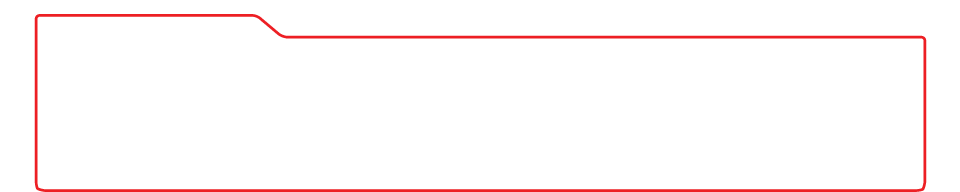
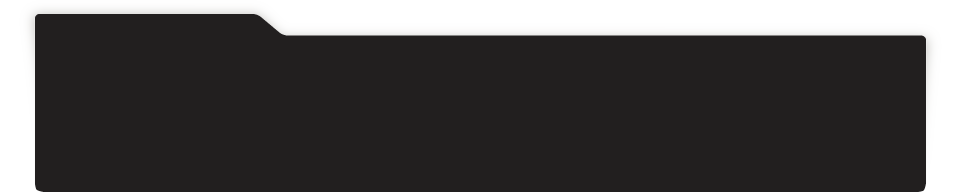
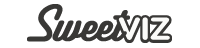
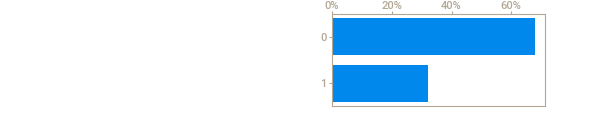
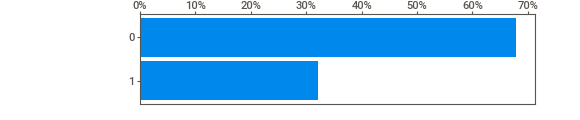
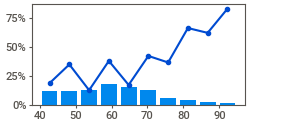
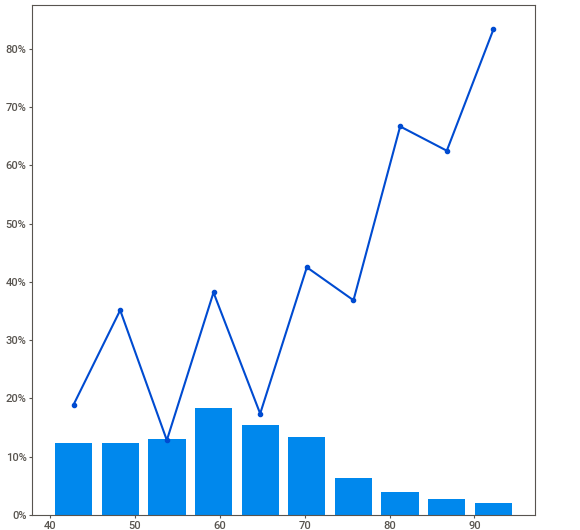
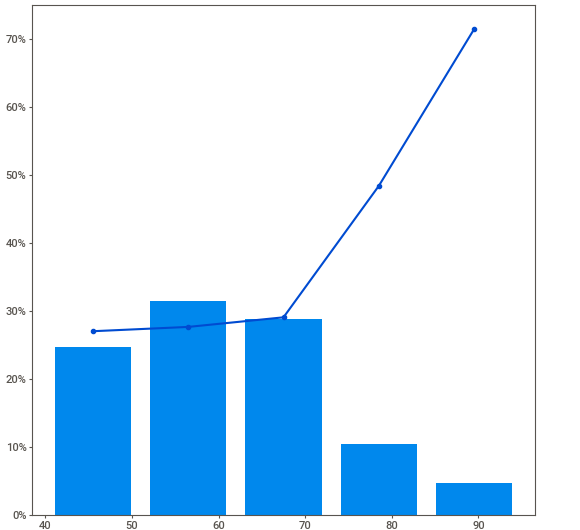
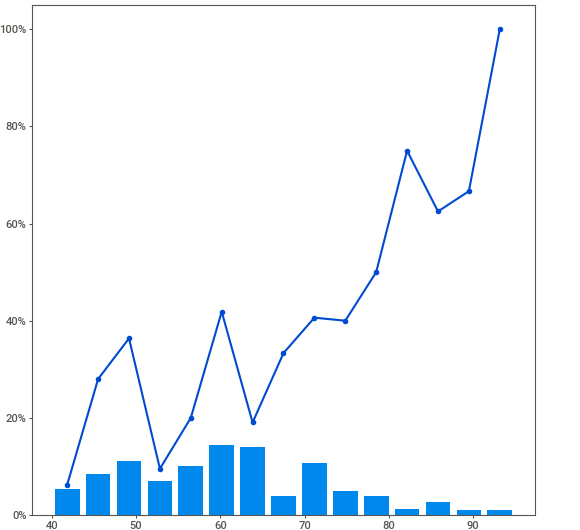
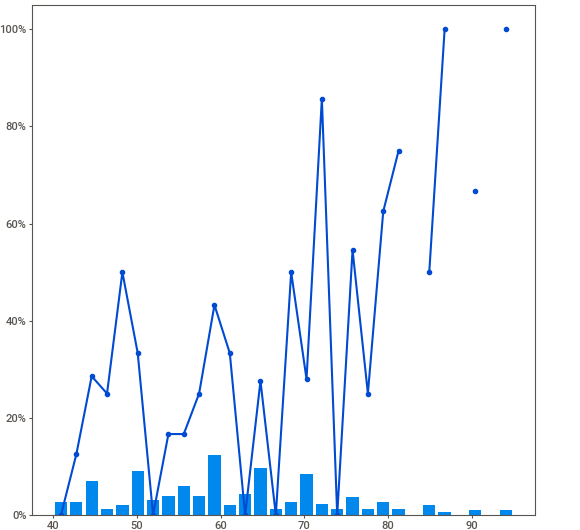
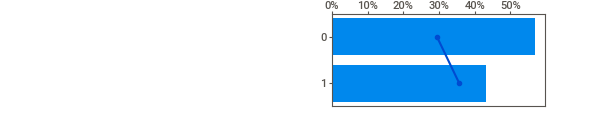
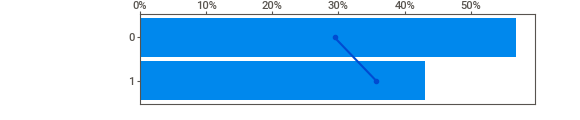
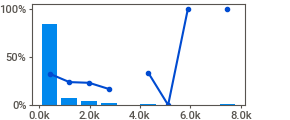
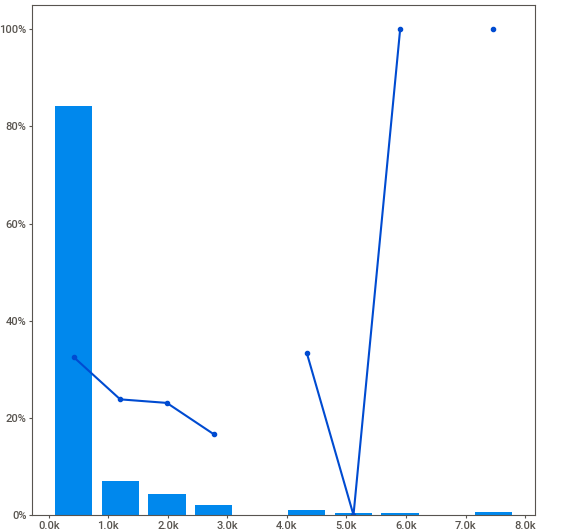
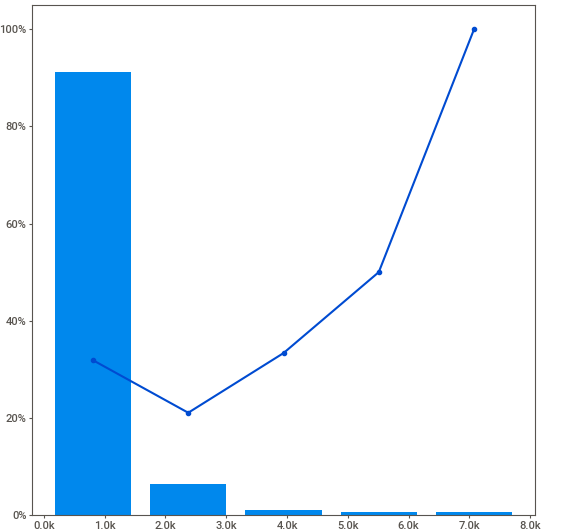
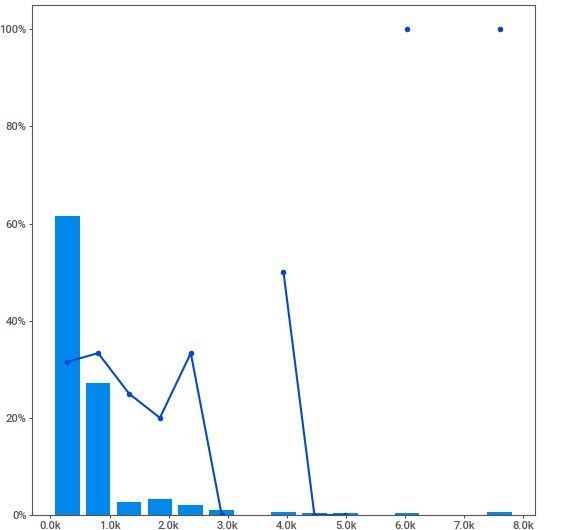
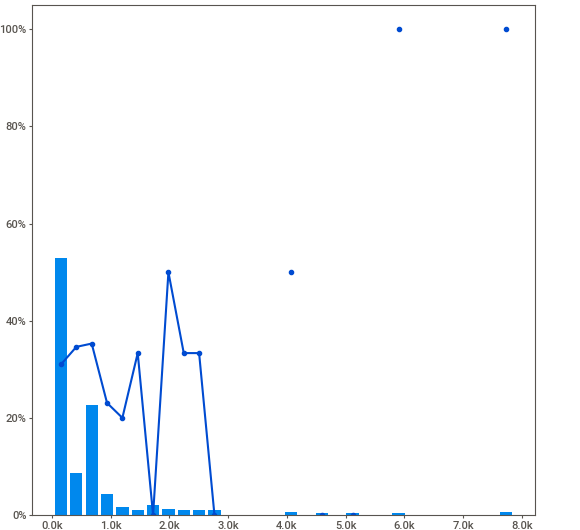
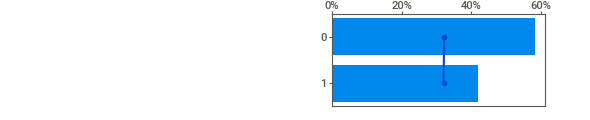
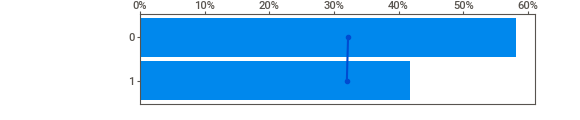
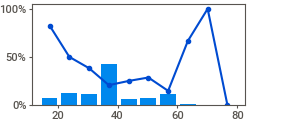
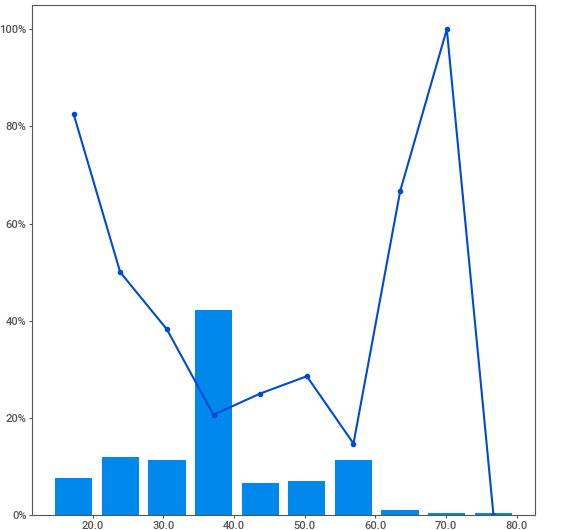
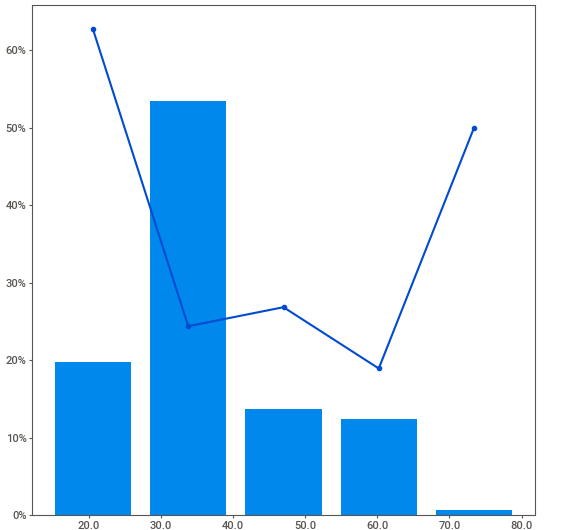
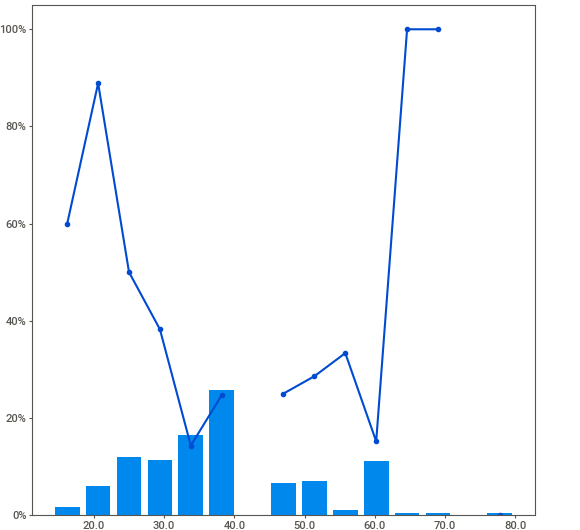
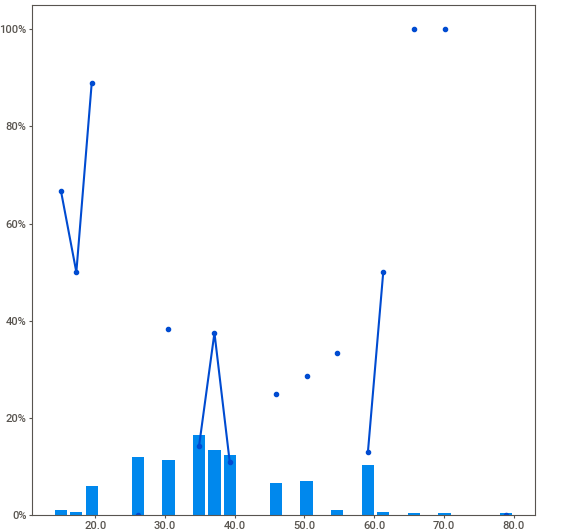
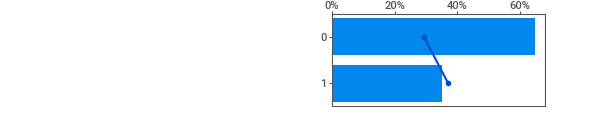
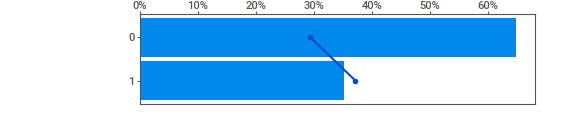
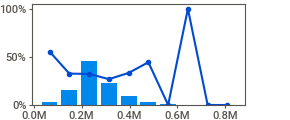
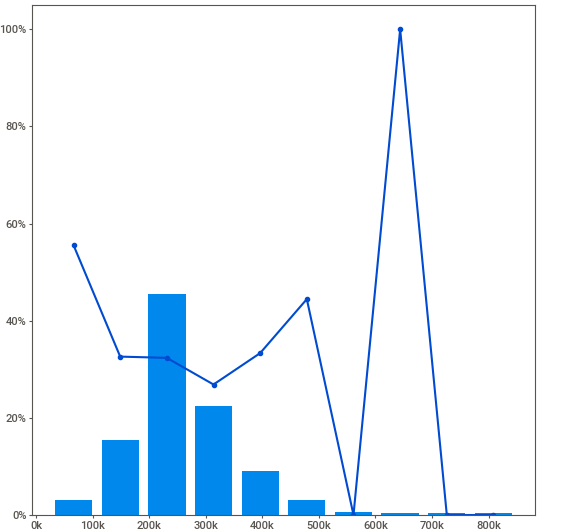
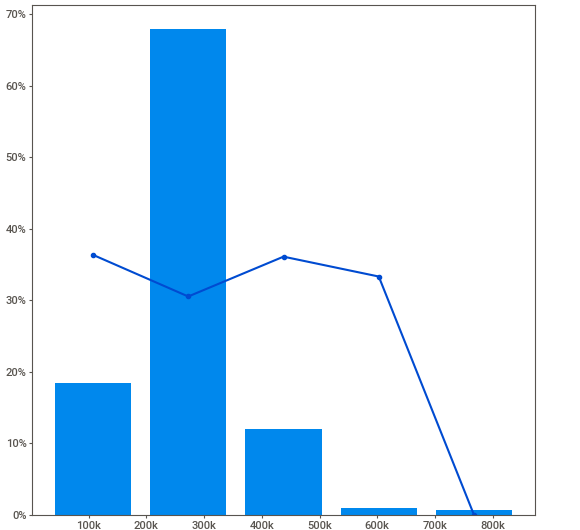
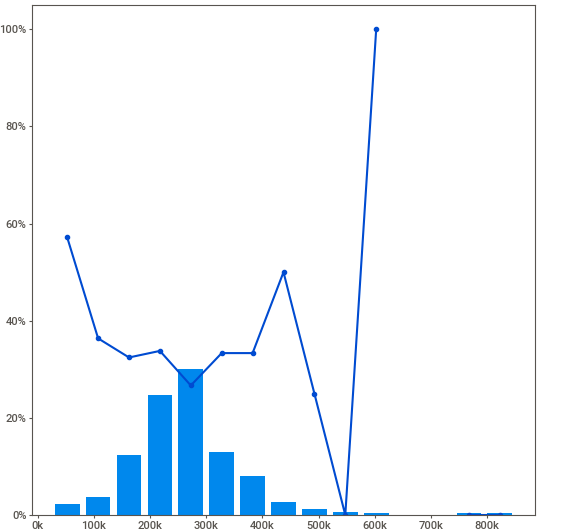
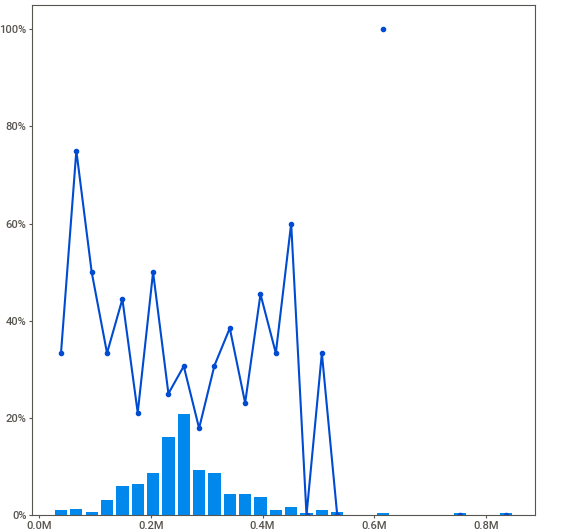
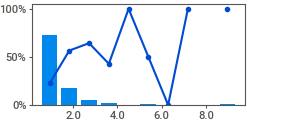
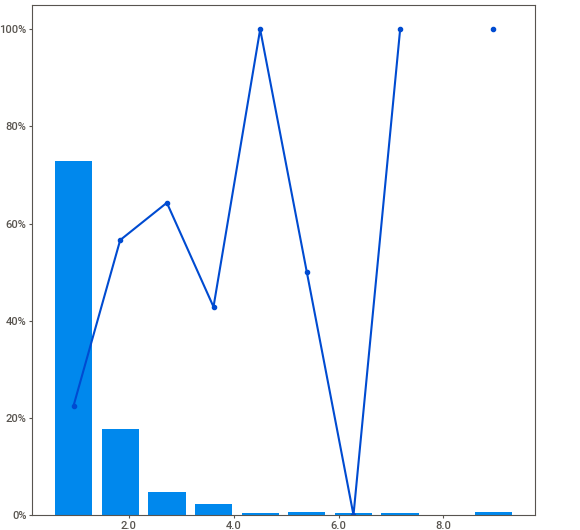
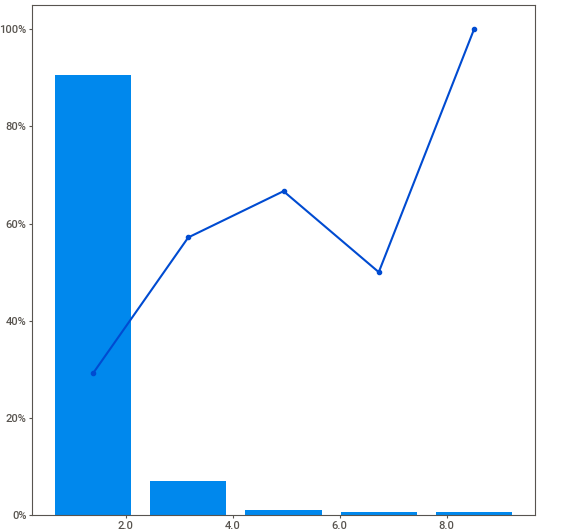
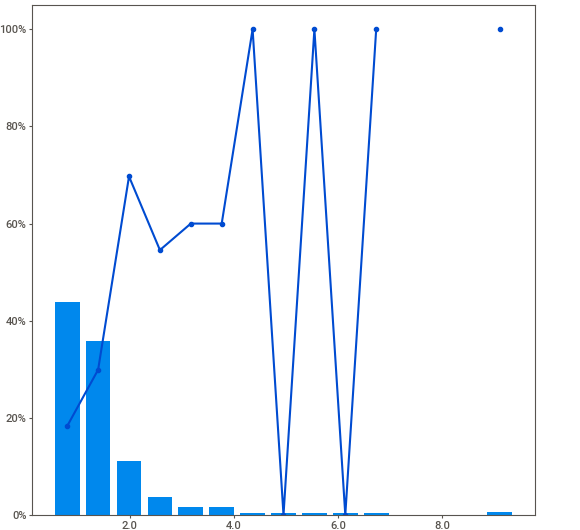
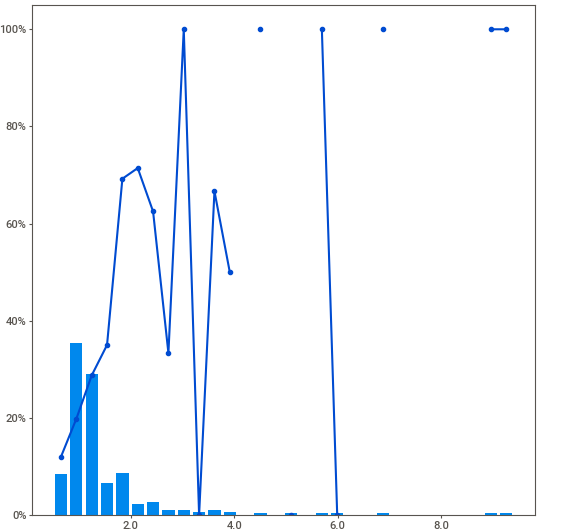
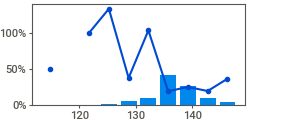
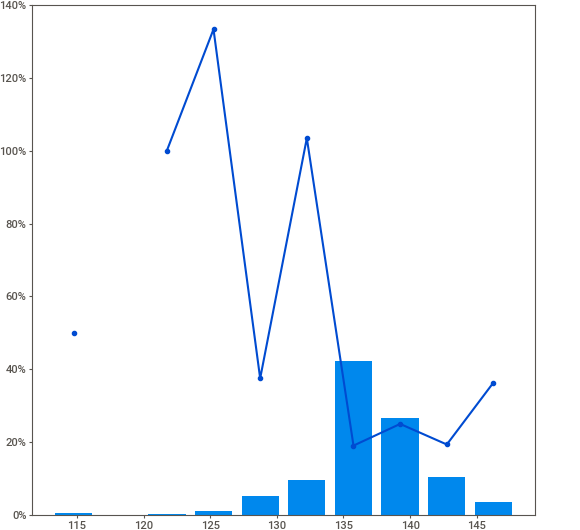
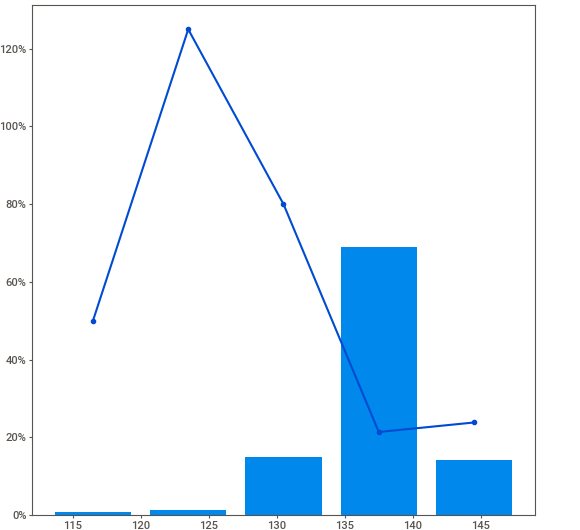
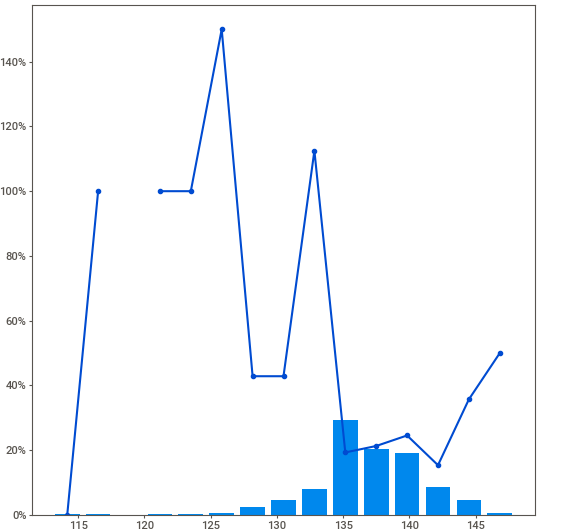
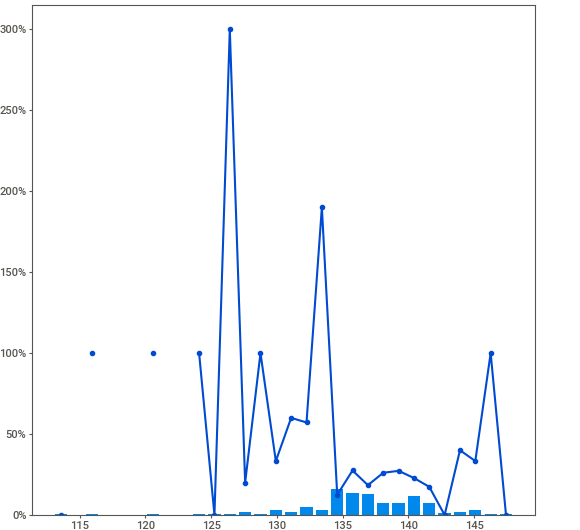
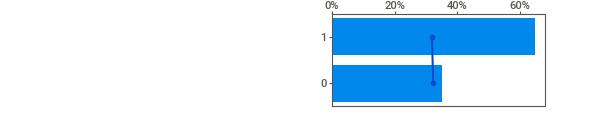
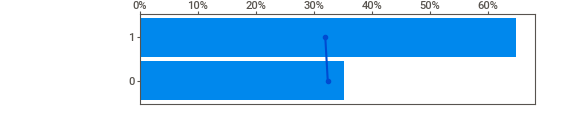
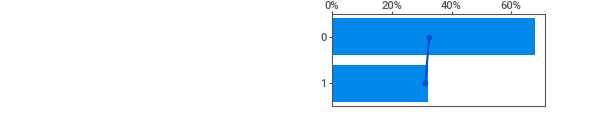
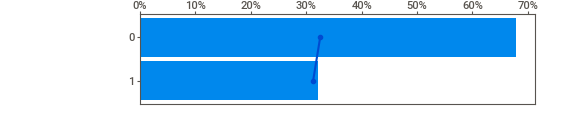
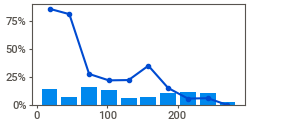
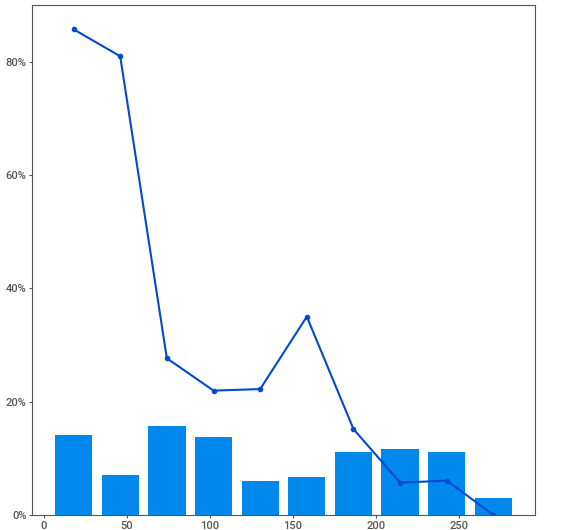
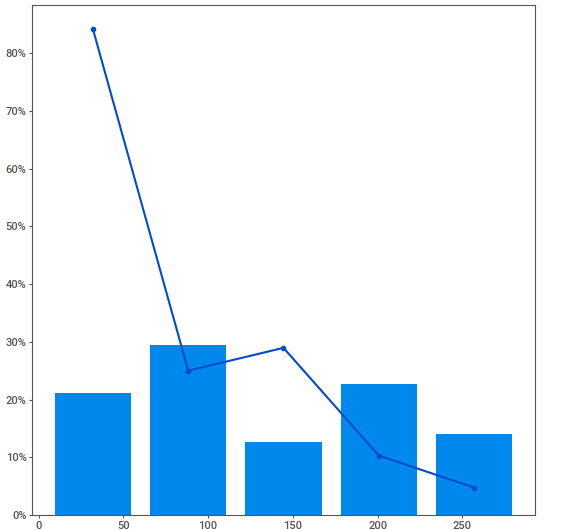
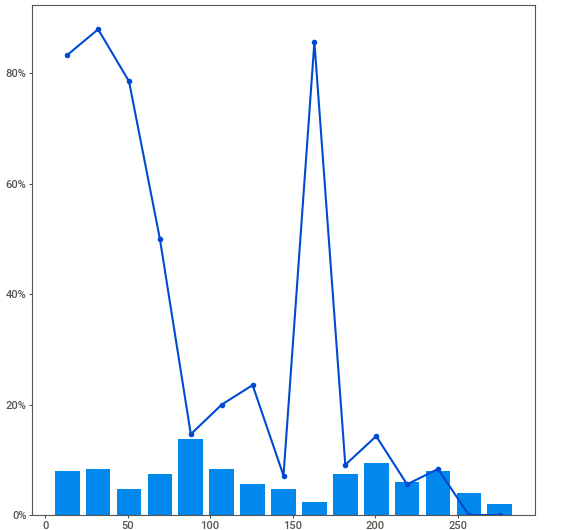
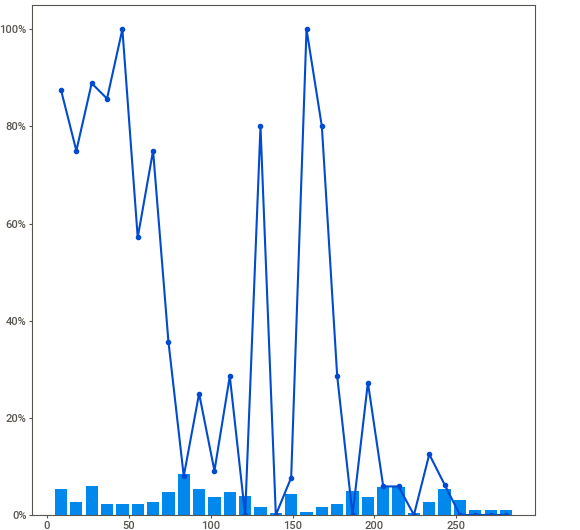
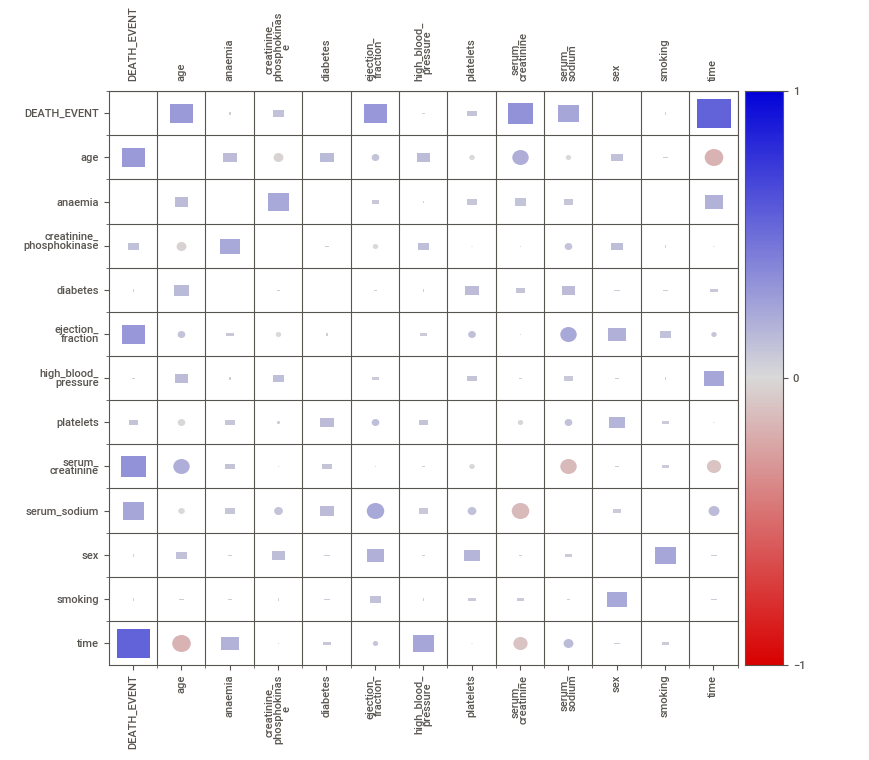
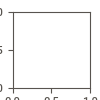

In [14]:
# Observando os dados
dash = sv.analyze(df, target_feat= 'DEATH_EVENT')
dash.show_notebook()

## * Observações*



* A partir dos 65 anos a tendência só aumenta

* 36% das pessoas com anemia acabam falecendo

* 32% das pessoas com diabete acabam falecendo

* 37% das pessoas com pressão alta acabam falecendo

* 31% dos fumantes acabam falecendo

* Quanto mais tempo acompanhado, menor a chance de vir a óbito



# *Tratando dados ausentes*

In [15]:
# Observando os valores ausentes
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# *Remoção de outliers*

In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


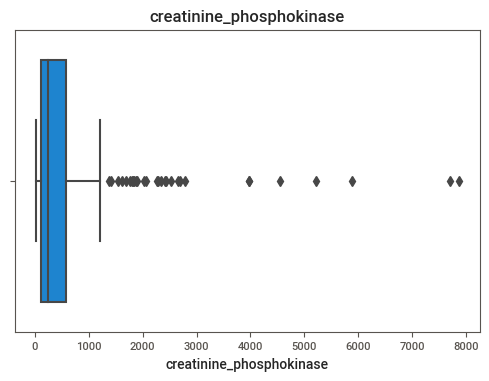

In [17]:
sns.boxplot(x = df['creatinine_phosphokinase']).set_title('creatinine_phosphokinase');

In [18]:
# Pegando o maior valor de 95% dos dados
top_creatinine_phosphokinase = df['creatinine_phosphokinase'].quantile(0.95)
top_creatinine_phosphokinase

2262.999999999999

In [19]:
# Adicionando ao valores maiores que o 95%, adicionando ele mesmo
df.loc[df['creatinine_phosphokinase'] > top_creatinine_phosphokinase, 'creatinine_phosphokinase' ] = top_creatinine_phosphokinase

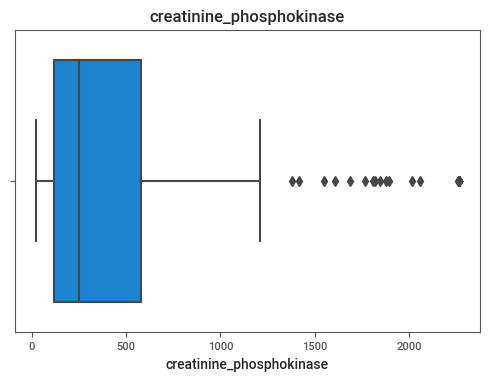

In [20]:
sns.boxplot(x = df['creatinine_phosphokinase']).set_title('creatinine_phosphokinase');

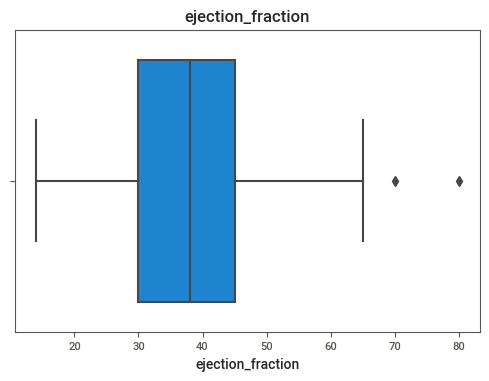

In [21]:
sns.boxplot(x = df['ejection_fraction']).set_title('ejection_fraction');

In [22]:
top_ejection_fraction = df['ejection_fraction'].quantile(0.95)
top_ejection_fraction

60.0

In [23]:
df.loc[df['ejection_fraction'] > top_ejection_fraction, 'ejection_fraction'] = top_ejection_fraction

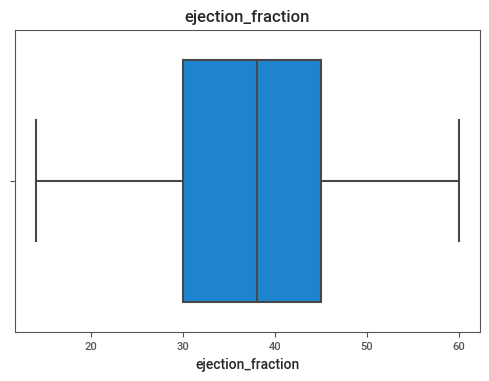

In [24]:
sns.boxplot(x = df['ejection_fraction']).set_title('ejection_fraction');

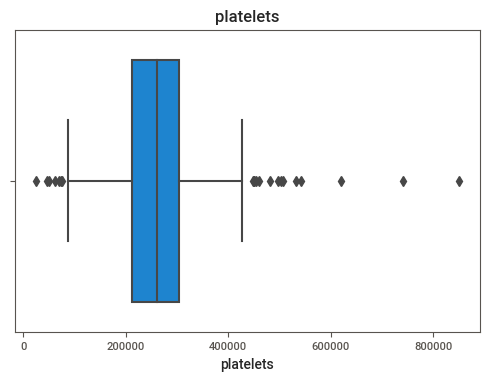

In [25]:
sns.boxplot(x = df['platelets']).set_title('platelets');

In [26]:
top_platelets = df['platelets'].quantile(0.95)
top_platelets

422499.9999999998

In [27]:
min_platelets = df['platelets'].quantile(0.05)
min_platelets

131800.0

In [28]:
df.loc[df['platelets'] > top_platelets, 'platelets'] = top_platelets
df.loc[df['platelets'] < min_platelets, 'platelets'] = min_platelets

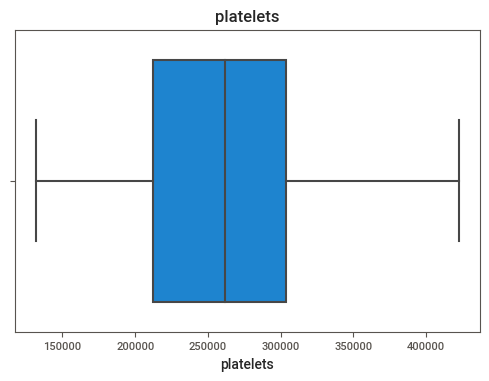

In [29]:
sns.boxplot(x = df['platelets']).set_title('platelets');

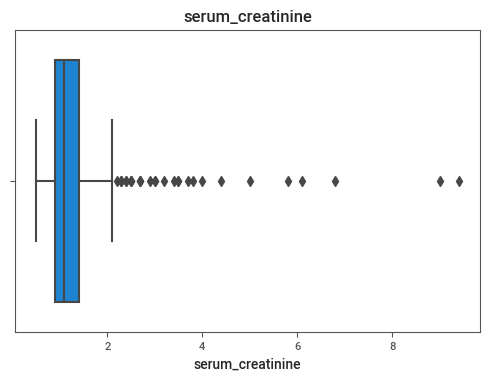

In [30]:
sns.boxplot(x = df['serum_creatinine']).set_title('serum_creatinine');

In [31]:
top_serum_creatinine = df['serum_creatinine'].quantile(0.975)
top_serum_creatinine

3.9100000000000024

In [32]:
df.loc[df['serum_creatinine'] > top_serum_creatinine, 'serum_creatinine'] = top_serum_creatinine

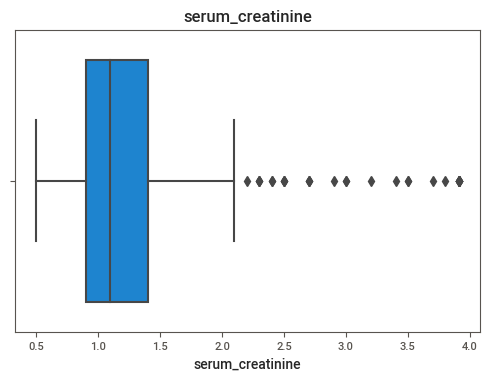

In [33]:
sns.boxplot(x = df['serum_creatinine']).set_title('serum_creatinine');

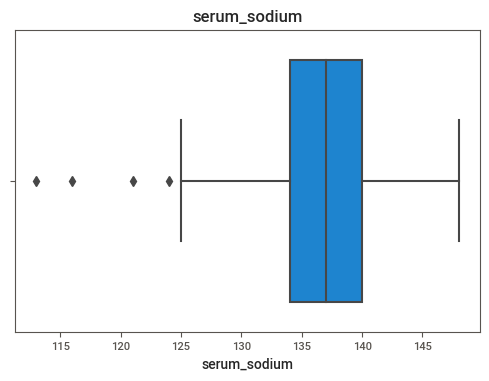

In [34]:
sns.boxplot(x = df['serum_sodium']).set_title('serum_sodium');

In [35]:
min_serum_sodium = df['serum_sodium'].quantile(0.015)
min_serum_sodium

125.47

In [36]:
df.loc[df['serum_sodium'] < min_serum_sodium, 'serum_sodium'] = min_serum_sodium

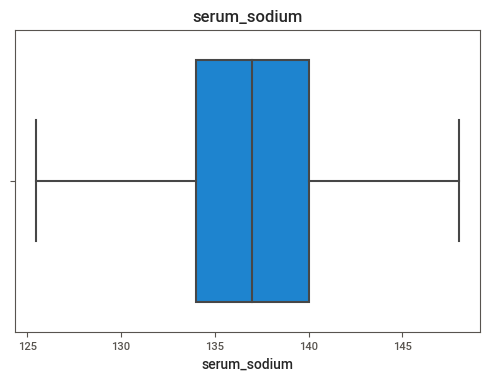

In [37]:
sns.boxplot(x = df['serum_sodium']).set_title('serum_sodium');

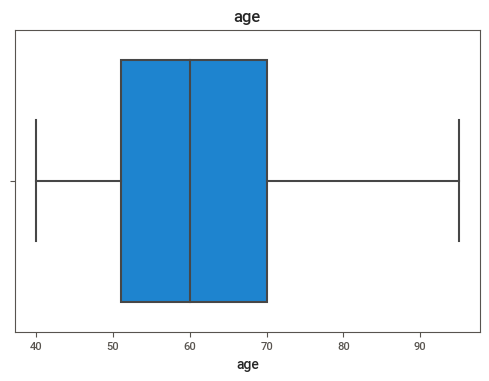

In [38]:
sns.boxplot(x = df['age']).set_title('age');

# *Engenharia de Variáveis*

In [39]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.0,0,20,1,265000.00,1.9,130.00,1,0,4,1
1,55.0,0,2263.0,0,38,0,263358.03,1.1,136.00,1,0,6,1
2,65.0,0,146.0,0,20,0,162000.00,1.3,129.00,1,1,7,1
3,50.0,1,111.0,0,20,0,210000.00,1.9,137.00,1,0,7,1
4,65.0,1,160.0,1,20,0,327000.00,2.7,125.47,0,0,8,1


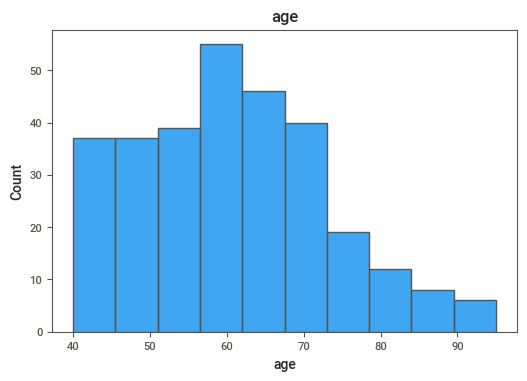

In [40]:
sns.histplot(x = df['age']).set_title('age');

In [41]:
df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [42]:
def aux(x):
  if x <= 55:
    return '40 a 55'
  elif x <= 65:
    return '55 a 65'
  elif x <= 75:
    return '65 a 75'
  else:
    return '75+'

df['age'] = df['age'].apply(aux)

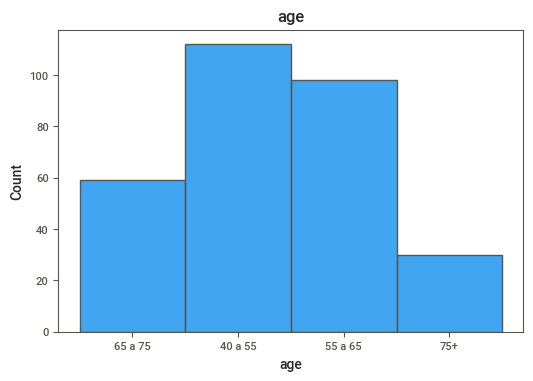

In [43]:
sns.histplot(x = df['age']).set_title('age');

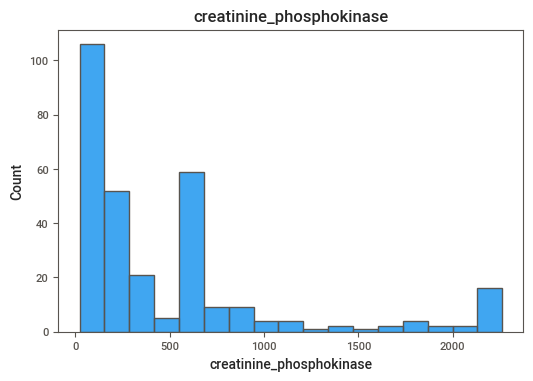

In [44]:
sns.histplot(x = df['creatinine_phosphokinase']).set_title('creatinine_phosphokinase');

In [45]:
df['creatinine_phosphokinase'].describe()

count     299.000000
mean      497.170569
std       575.990231
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      2263.000000
Name: creatinine_phosphokinase, dtype: float64

In [46]:
"""def aux2(x):
  if x <= 500:
    return '0 a 500'
  elif x <= 1000:
    return '500 a 1000'
  elif x <= 1500:
    return '1000 a 1500'
  else:
    return '1500+'

df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].apply(aux2)"""

"def aux2(x):\n  if x <= 500:\n    return '0 a 500'\n  elif x <= 1000:\n    return '500 a 1000'\n  elif x <= 1500:\n    return '1000 a 1500'\n  else:\n    return '1500+'\n\ndf['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].apply(aux2)"

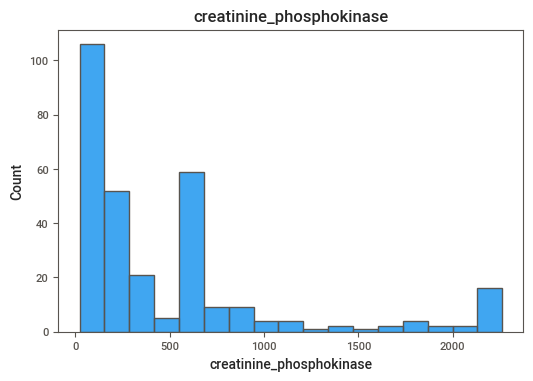

In [47]:
sns.histplot(x = df['creatinine_phosphokinase']).set_title('creatinine_phosphokinase');

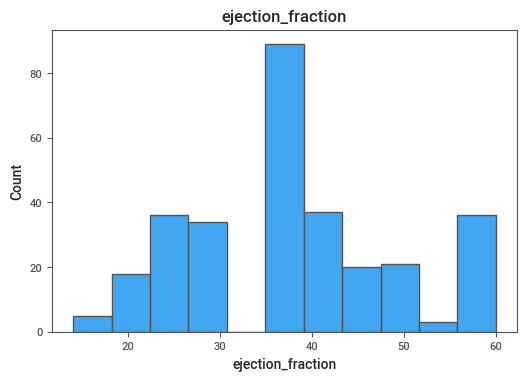

In [48]:
sns.histplot(x = df['ejection_fraction']).set_title('ejection_fraction');

In [49]:
df['ejection_fraction'].describe()

count    299.000000
mean      37.953177
std       11.511789
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       60.000000
Name: ejection_fraction, dtype: float64

In [50]:
def aux3(x):
  if x <= 30:
    return '0 a 30'
  elif x <= 40:
    return '30 a 40'
  elif x <= 50:
    return '40 a 50'
  else:
    return '50+'

df['ejection_fraction'] = df['ejection_fraction'].apply(aux3)

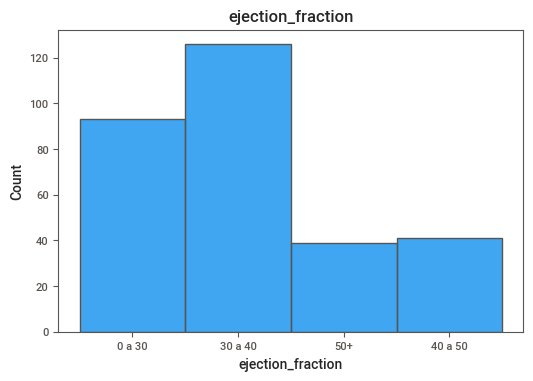

In [51]:
sns.histplot(x = df['ejection_fraction']).set_title('ejection_fraction');

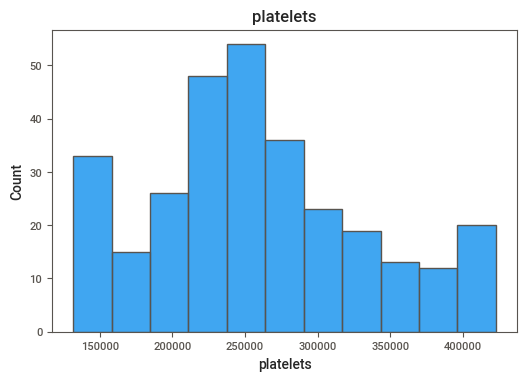

In [52]:
sns.histplot(x = df['platelets']).set_title('platelets');

In [53]:
df['platelets'].describe()

count       299.000000
mean     260008.196488
std       76403.517239
min      131800.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      422500.000000
Name: platelets, dtype: float64

In [54]:
"""def aux4(x):
  if x <= 200000:
    return '0 a 200000'
  elif x <= 270000:
    return '200000 a 270000'
  elif x <= 340000:
    return '270000 a 340000'
  else:
    return '340000+'

df['platelets'] = df['platelets'].apply(aux4)"""

"def aux4(x):\n  if x <= 200000:\n    return '0 a 200000'\n  elif x <= 270000:\n    return '200000 a 270000'\n  elif x <= 340000:\n    return '270000 a 340000'\n  else:\n    return '340000+'\n\ndf['platelets'] = df['platelets'].apply(aux4)"

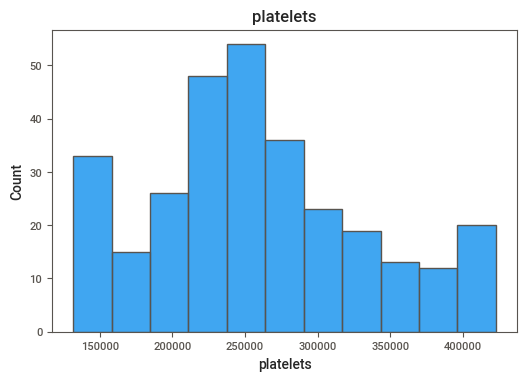

In [55]:
sns.histplot(x = df['platelets']).set_title('platelets');

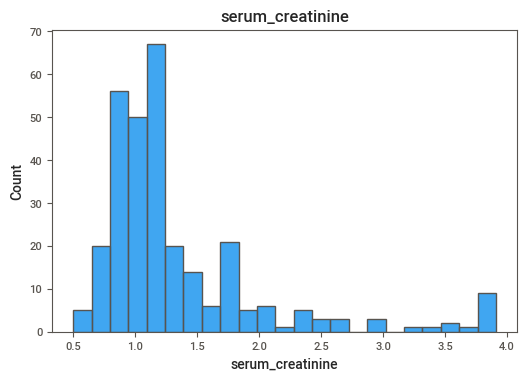

In [56]:
sns.histplot(x = df['serum_creatinine']).set_title('serum_creatinine');

In [57]:
df['serum_creatinine'].describe()

count    299.000000
mean       1.329599
std        0.701779
min        0.500000
25%        0.900000
50%        1.100000
75%        1.400000
max        3.910000
Name: serum_creatinine, dtype: float64

In [58]:
def aux5(x):
  if x <= 1.0:
    return '0 a 1'
  elif x <= 1.5:
    return '1 a 1.5'
  elif x <= 2.0:
    return '1.5 a 2.0'
  else:
    return '2+'

df['serum_creatinine'] = df['serum_creatinine'].apply(aux5)

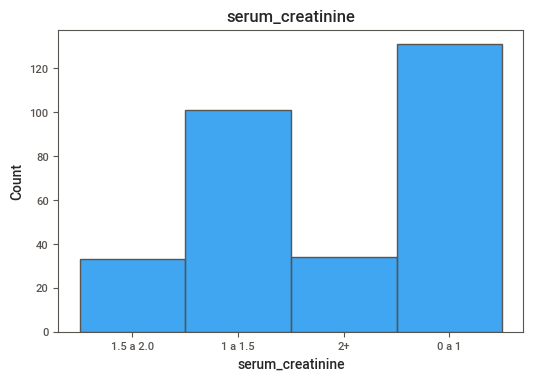

In [59]:
sns.histplot(x = df['serum_creatinine']).set_title('serum_creatinine');

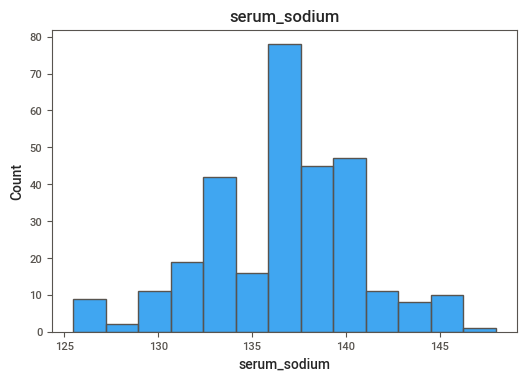

In [60]:
sns.histplot(x = df['serum_sodium']).set_title('serum_sodium');

In [61]:
df['serum_sodium'].describe()

count    299.000000
mean     136.720234
std        4.054702
min      125.470000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [62]:
"""def aux6(x):
  if x <= 130:
    return '0 a 130'
  elif x <= 135:
    return '130 a 135'
  elif x <= 140:
    return '135 a 140'
  else:
    return '140+'

df['serum_sodium'] = df['serum_sodium'].apply(aux6)"""

"def aux6(x):\n  if x <= 130:\n    return '0 a 130'\n  elif x <= 135:\n    return '130 a 135'\n  elif x <= 140:\n    return '135 a 140'\n  else:\n    return '140+'\n\ndf['serum_sodium'] = df['serum_sodium'].apply(aux6)"

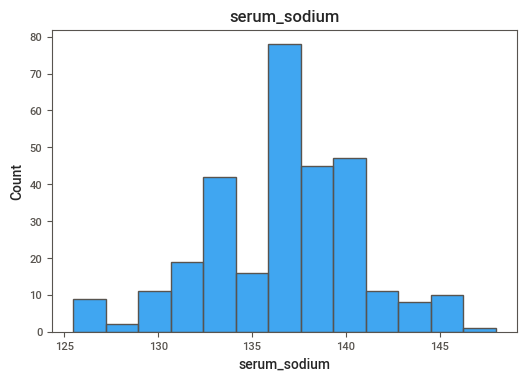

In [63]:
sns.histplot(x = df['serum_sodium']).set_title('serum_sodium');

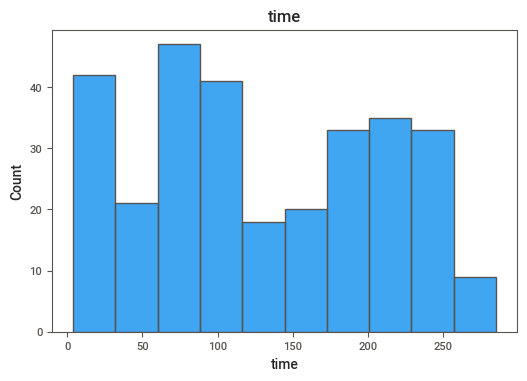

In [64]:
sns.histplot(x = df['time']).set_title('time');

In [65]:
df['time'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

In [66]:
def aux7(x):
  if x <= 70:
    return '0 a 70'
  elif x <= 140:
    return '70 a 140'
  elif x <= 210:
    return '140 a 210'
  else:
    return '210+'

df['time'] = df['time'].apply(aux7)

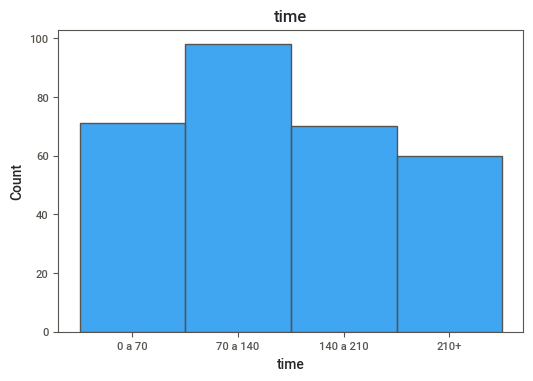

In [67]:
sns.histplot(x = df['time']).set_title('time');

# *Padronização das Variáveis*

In [68]:
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df[['creatinine_phosphokinase', 'platelets', 'serum_sodium']] = sc.fit_transform(df[['creatinine_phosphokinase', 'platelets', 'serum_sodium']])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,65 a 75,0,0.147523,0,0 a 30,1,0.065444,1.5 a 2.0,-1.660171,1,0,0 a 70,1
1,40 a 55,0,3.070868,0,30 a 40,0,0.043917,1 a 1.5,-0.177927,1,0,0 a 70,1
2,55 a 65,0,-0.610704,0,0 a 30,0,-1.284921,1 a 1.5,-1.907212,1,1,0 a 70,1
3,40 a 55,1,-0.671570,0,0 a 30,0,-0.655625,1.5 a 2.0,0.069114,1,0,0 a 70,1
4,55 a 65,1,-0.586357,1,0 a 30,0,0.878286,2+,-2.779266,0,0,0 a 70,1


# *Dummyficação*

In [69]:
variaveis = ['age', 'ejection_fraction', 'serum_creatinine', 'time']

df = pd.get_dummies(df, columns = variaveis, drop_first = True)

df.head()

,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_sodium,sex,smoking,DEATH_EVENT,age_55 a 65,...,age_75+,ejection_fraction_30 a 40,ejection_fraction_40 a 50,ejection_fraction_50+,serum_creatinine_1 a 1.5,serum_creatinine_1.5 a 2.0,serum_creatinine_2+,time_140 a 210,time_210+,time_70 a 140
0,0,0.147523,0,1,0.065444,-1.660171,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,3.070868,0,0,0.043917,-0.177927,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,0,-0.610704,0,0,-1.284921,-1.907212,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1,-0.671570,0,0,-0.655625,0.069114,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,-0.586357,1,0,0.878286,-2.779266,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


# *Machine Learning*

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [71]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

In [73]:
# Separando os dados em X e Y
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

# Criando uma lista com modelos selecionados
lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=150, max_depth = 5),
                        RandomForestClassifier(n_estimators=150, max_depth = 7)]

nome_dos_modelos = ['Regressão Logistica',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 150, prof = 5)', 
                        'Random Forest (arvs = 150, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando modelo: ' + nome_dos_modelos[i])

    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T
    


Rodando modelo: Regressão Logistica
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 150, prof = 5)
Rodando modelo: Random Forest (arvs = 150, prof = 7)


In [74]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Regressão Logistica,0.837874,0.677222,0.804881,0.795575,0.724015
Árvore (prof = 5),0.789253,0.664444,0.681046,0.756091,0.659756
Bagging,0.804368,0.592222,0.758149,0.748135,0.653367
Árvore (prof = 7),0.785862,0.617222,0.695776,0.742004,0.643338
Árvore (prof = 3),0.784080,0.562222,0.685391,0.724444,0.604724
"Random Forest (arvs = 50, prof = 7)",0.786092,0.481111,0.775952,0.704960,0.581782
"Random Forest (arvs = 100, prof = 7)",0.786034,0.486111,0.760476,0.707341,0.579743
"Random Forest (arvs = 150, prof = 7)",0.785747,0.468889,0.800258,0.702361,0.568141
5-NN,0.745862,0.457778,0.665377,0.669782,0.534870
"Random Forest (arvs = 50, prof = 5)",0.775920,0.394444,0.807262,0.675079,0.522447


# *Tunagem de Hiperparâmetros*

In [104]:
# Função para escolher o modelo com os melhores parametros
def Tunagem(modelo, treino, targets, parametros, tipo = 'grid', metrica = 'accuracy', n_iter = 20):
 
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = metrica, cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = metrica, cv = validacao,
                                n_iter = n_iter, verbose = 1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))
    
    # Exibindo o melhor extimador
    return melhor

In [105]:
# Parametros para Árvore de Decisão
parametros = {   
              'max_depth' : np.arange(1,11), 
              'min_samples_split': np.arange(2,21,2),
              'min_samples_leaf': np.arange(1,11),
                 }

# Criando o modelo 
modelo = DecisionTreeClassifier()

arvore = Tunagem(modelo, X, y, parametros, tipo = 'random',n_iter = 50)
arvore

Fitting 30 folds for each of 50 candidates, totalling 1500 fits

Acuracia: 0.8361
Melhores parâmetros: {'min_samples_split': 14, 'min_samples_leaf': 4, 'max_depth': 4}



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=4,
                       min_samples_split=14, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [106]:
# Parametros para o KNN
parametros = {  'n_neighbors' : np.arange(1, 50, 2)  }

# Criando o modelo 
modelo = KNeighborsClassifier()

knn = Tunagem(modelo, X, y, parametros, tipo = 'random',  n_iter = 50)

Fitting 30 folds for each of 25 candidates, totalling 750 fits

Acuracia: 0.7461
Melhores parâmetros: {'n_neighbors': 3}



In [107]:
# Parametros para Random Forest
parametros = {   
                 'n_estimators': [50, 100, 150],
                 'max_features': [2,3,4,5],
                 'bootstrap': [True, False] ,      
                 'max_depth' : [2, 4, 6, 8, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]
                 }

# Criando o modelo 
modelo = RandomForestClassifier()

rf = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 30)
rf

Fitting 30 folds for each of 30 candidates, totalling 900 fits

Acuracia: 0.8204
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 8, 'bootstrap': False}



RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [113]:
# Parametros para Random Forest
parametros={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

# Criando modelo
modelo = LogisticRegression()


lr = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 30)
lr

Fitting 30 folds for each of 14 candidates, totalling 420 fits

Acuracia: 0.8451
Melhores parâmetros: {'penalty': 'l2', 'C': 100.0}



LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)